**Simple Linear Regression 2 (Boston Housing database)**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:




*   **CRIM** - per capita crime rate by town
*   **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

*   **INDUS** - proportion of non-retail business acres per town.

*   **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   **NOX** - nitric oxides concentration (parts per 10 million)

*   **RM** - average number of rooms per dwelling

*   **AGE** - proportion of owner-occupied units built prior to 1940

*   **DIS** - weighted distances to five Boston employment centres

*   **RAD** - index of accessibility to radial highways

*   **TAX** - full-value property-tax rate per $10,000

*   **PTRATIO** - pupil-teacher ratio by town

*   **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


*   **LSTAT** - % lower status of the population

*   **MEDV** - Median value of owner-occupied homes in $1000's








**1. Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**2.Importing Datasets**

In [2]:
dataset=pd.read_csv('HousingData.csv')

**3.EDA for dataset**

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
dataset.shape

(506, 14)

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


**4.Checking for Missing data**

In [8]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: True


In [9]:
dataset=dataset.fillna(dataset.mean())
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**5.Correlation between Variables**

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
ZN      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
INDUS    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
CHAS    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
NOX      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
RM      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
AGE      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
DIS     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
RAD      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
TAX      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
PTRATIO  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
B       -0.370163  0.167431 

<Axes: >

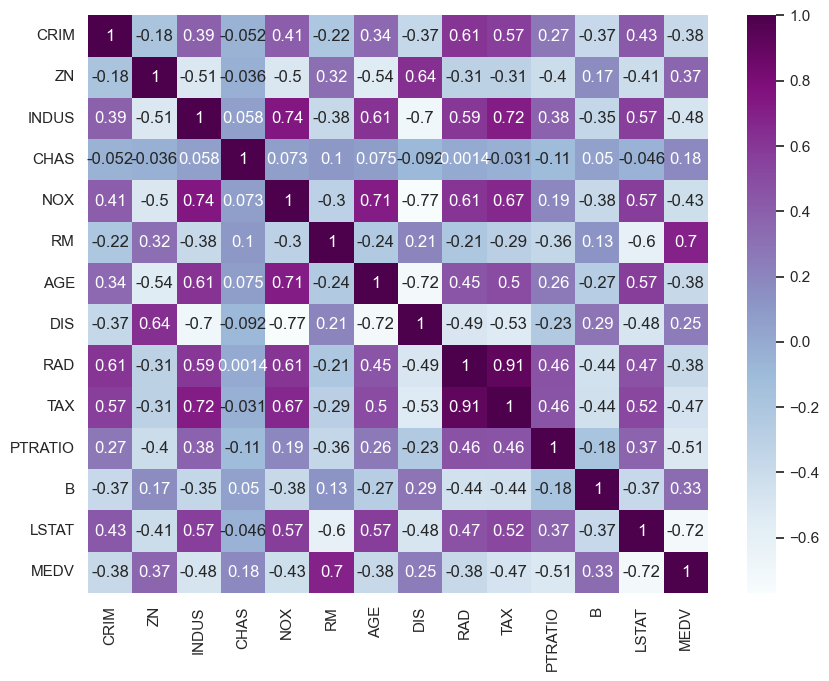

In [11]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

By looking at the correlation matrix we can see that **RM** has a strong positive correlation with **MEDV (0.7)**, **PTRATIO** which has negative correlation with **MEDV(-0.51)** and **LSTAT** has a high negative correlation with **MEDV (-0.72)**.

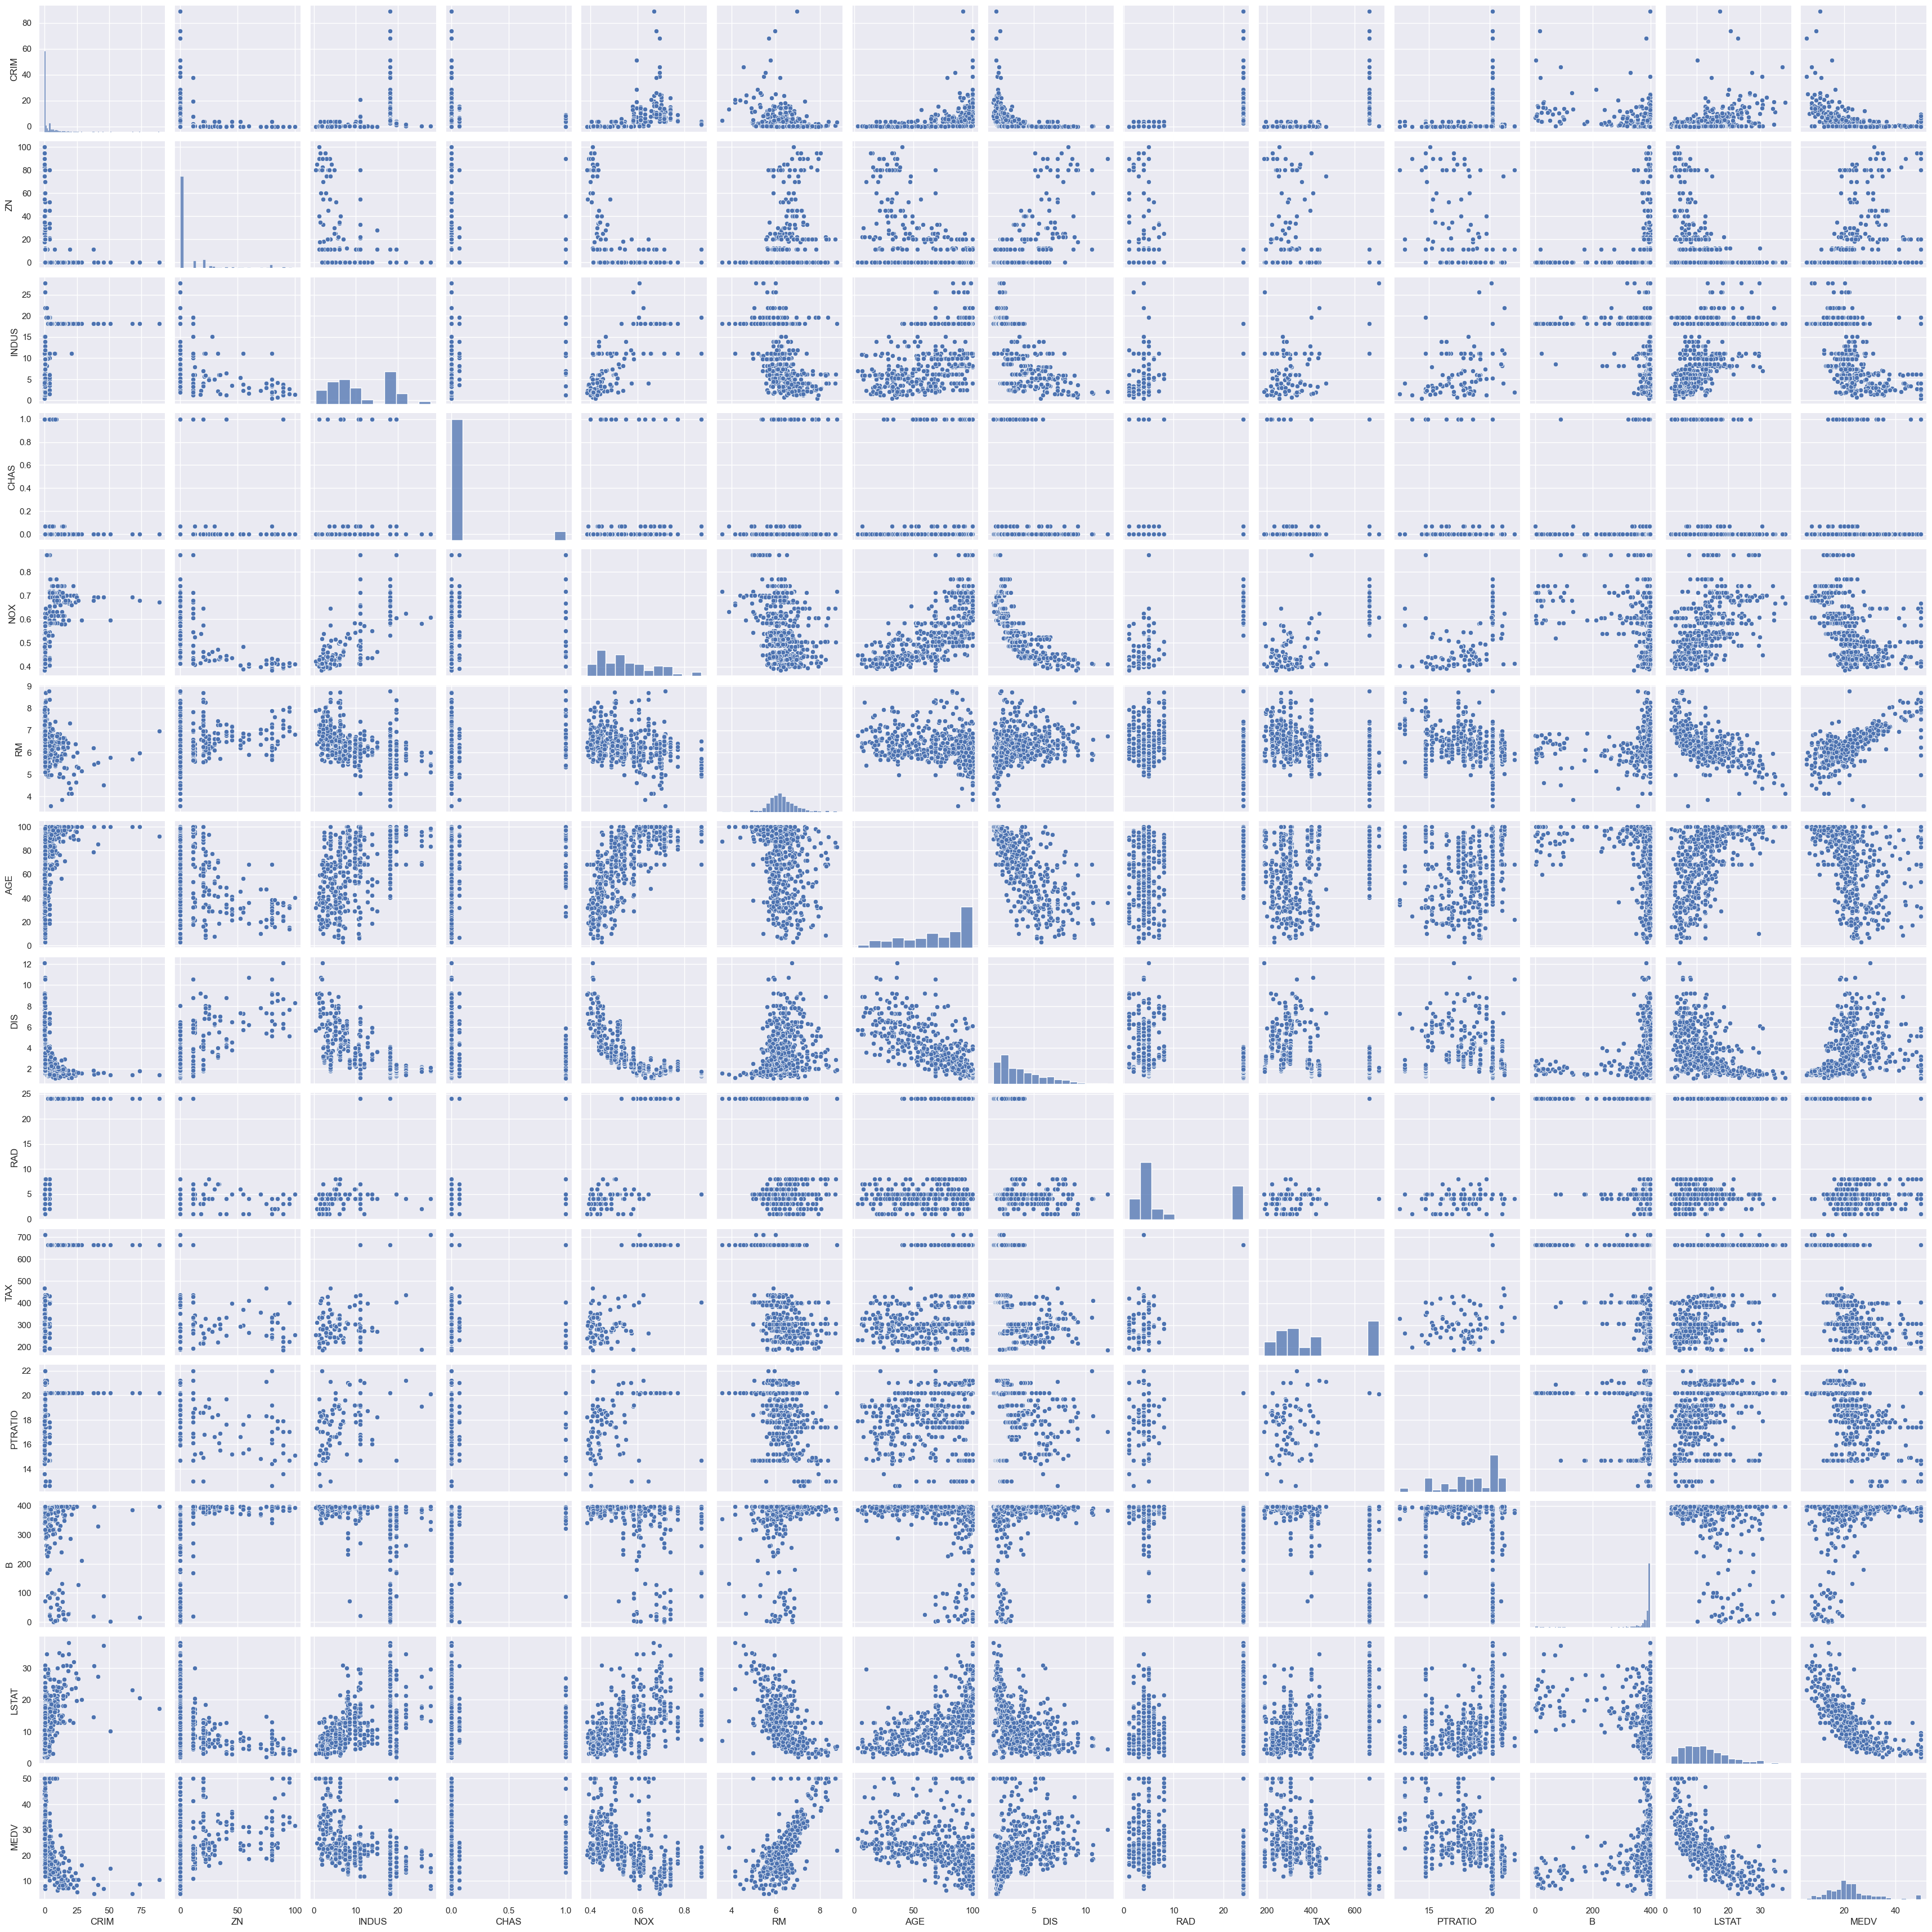

In [12]:
sns.pairplot(dataset)

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

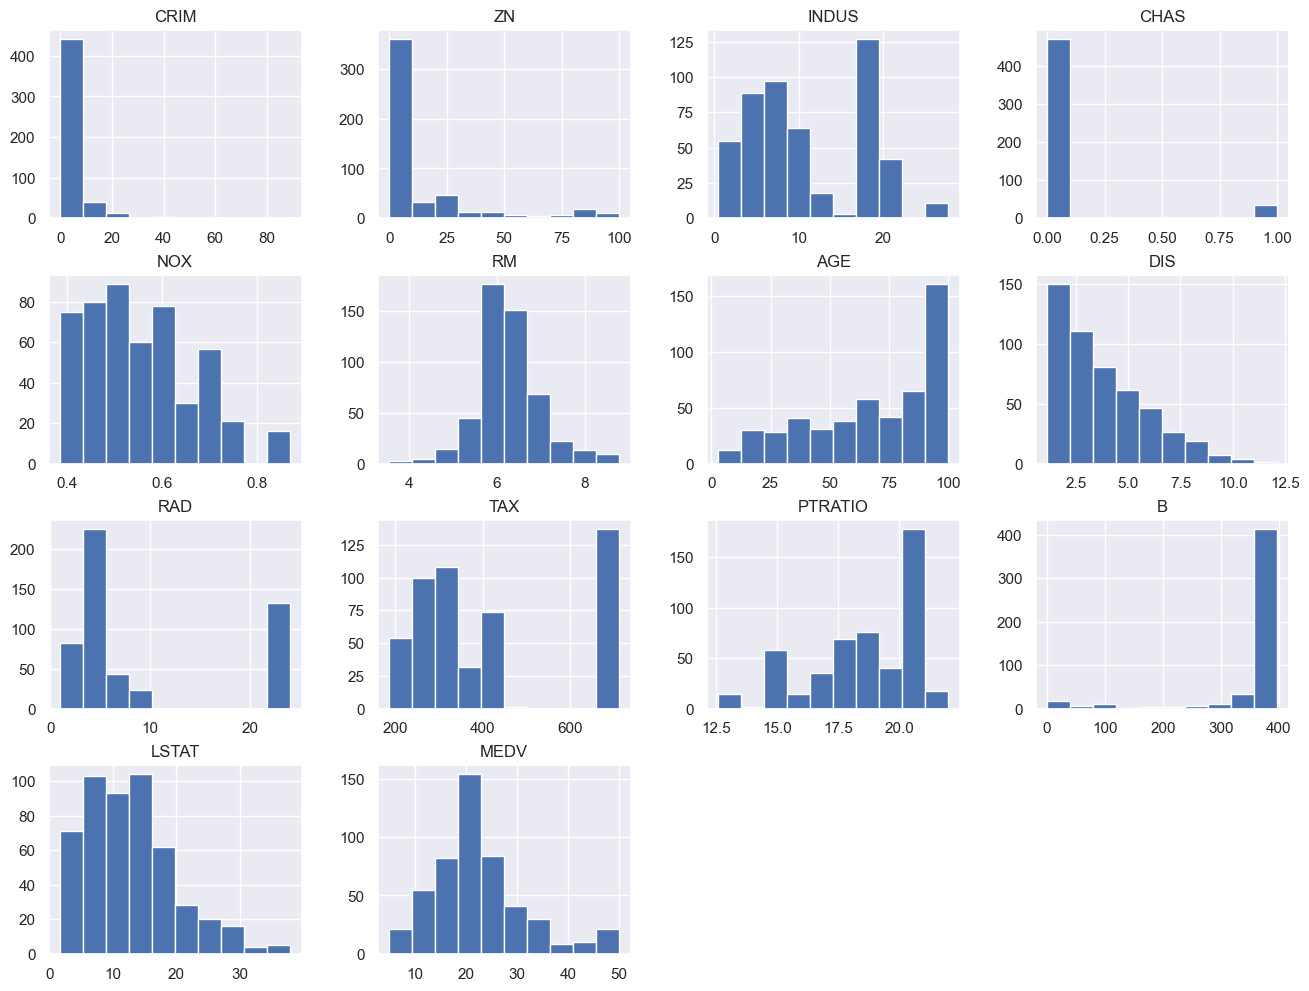

In [13]:
dataset.hist(bins=10, figsize=(16,12))

<Axes: xlabel='MEDV', ylabel='LSTAT'>

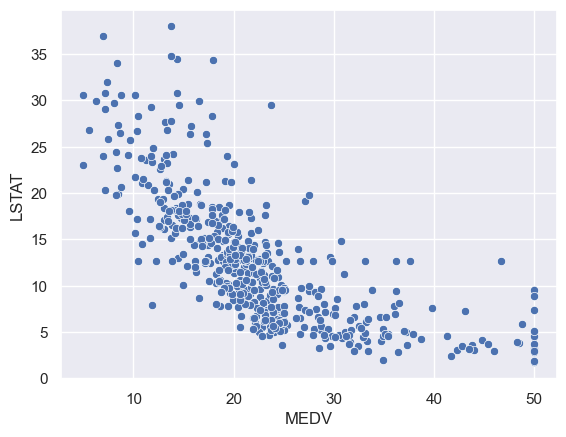

In [14]:
sns.scatterplot(y='LSTAT',x='MEDV',data=dataset)

<Axes: xlabel='MEDV', ylabel='RM'>

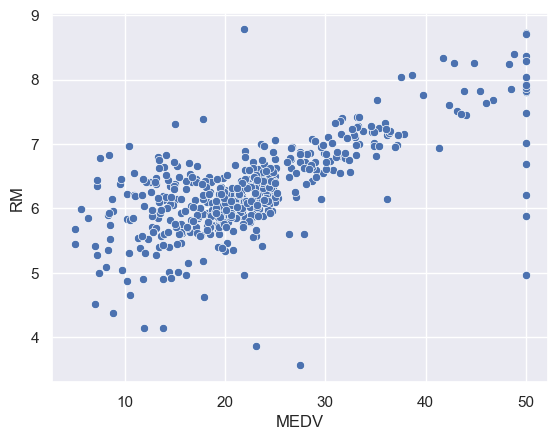

In [15]:
sns.scatterplot(y='RM',x='MEDV',data=dataset)

<Axes: xlabel='MEDV', ylabel='PTRATIO'>

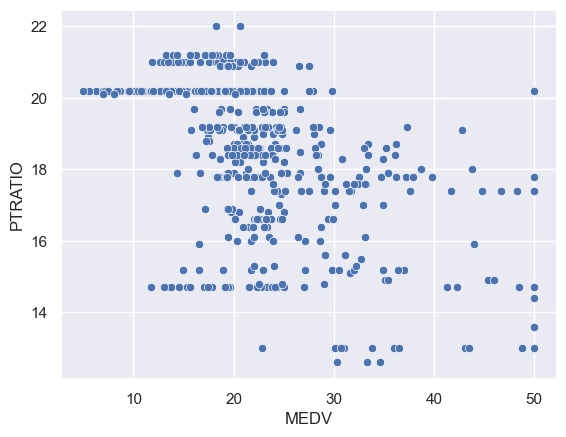

In [16]:
sns.scatterplot(y='PTRATIO',x='MEDV',data=dataset)

**6.Dependent and Independent Variable**

In [18]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#print(X)
#print(y)

**7.Splitting the dataset**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (337, 13)
y_train: (337,)
X_test: (169, 13)
y_test: (169,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
print('Explained variation: {}'.format(pca.explained_variance_ratio_))

Explained variation: [0.47217721 0.10694978 0.09603822 0.06927484 0.06515412 0.04860002
 0.03947911 0.03189555 0.02110436 0.01778503 0.01416238 0.0128819
 0.00449749]


**8. Simple Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [24]:
print('Model intercept:', slr.intercept_)
print('Model coefficients:', slr.coef_)

Model intercept: 22.335311572700295
Model coefficients: [-2.29456491 -0.18009527  3.86551549 -0.57450362 -2.17925393 -0.19615469
  0.64350353  1.06764038  0.19872427  0.29054014  0.70164356 -3.6834995
 -3.13913569]


**Prediction - Training dataset - Linear** 

In [25]:
y_pred = slr.predict(X_train)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.714705629765939

**Prediction - Testing data- Linear**

In [27]:
y_pred1 = slr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7506463551085165

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

lin_error = "MSE: " + str(round(mse, 2)) + "," + " MAE: " + str(round(mae, 2)) + "," +" RMSE: " + str(round(rmse, 2))

     Actual value  Predicted value
0            28.2        32.562230
1            23.9        28.117968
2            16.6        17.921904
3            22.0        21.645352
4            20.8        17.362697
..            ...              ...
164          20.8        18.596399
165          20.1        20.870448
166          23.1        26.335054
167          13.1        16.207796
168          16.2        15.200067

[169 rows x 2 columns]


<Axes: >

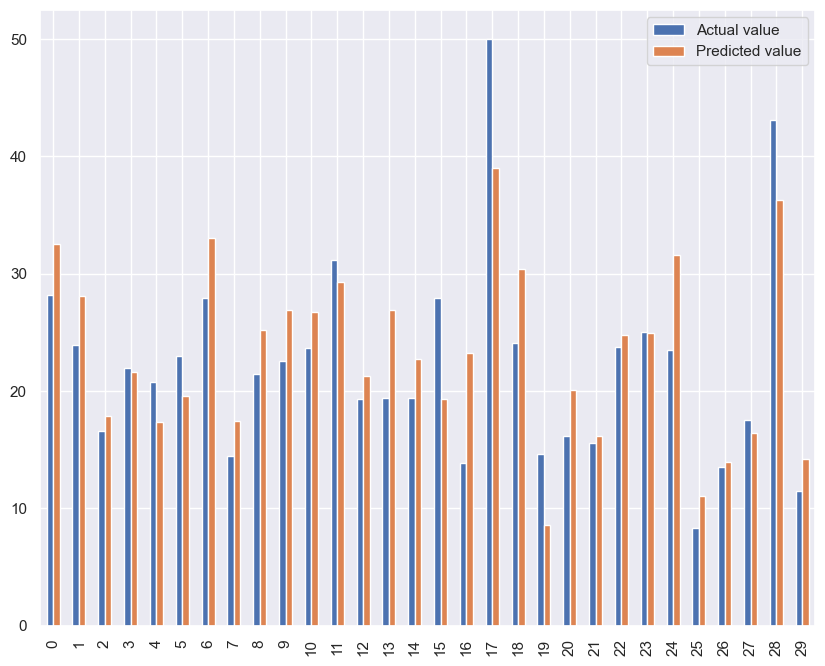

In [30]:
comparision_linear = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred1})
print(comparision_linear)

df = comparision_linear.head(30)
df.plot(kind = 'bar',figsize = (10,8))

**9.Polynomial Regression** 

In [31]:
from sklearn.preprocessing import PolynomialFeatures
pnr=PolynomialFeatures(degree=2)
poly=pnr.fit_transform(X_train)
slr.fit(poly,y_train)

LinearRegression()

In [32]:
y_pred_poly=slr.predict(pnr.transform(X_test))

In [33]:
r2_score(y_test, y_pred_poly)

0.7463680885616796

In [34]:
mse1 = mean_squared_error(y_test, y_pred_poly)
mae1 = mean_absolute_error(y_test,y_pred_poly)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred_poly))

poly_error = "MSE: " + str(round(mse1, 2)) + "," + " MAE: " + str(round(mae1, 2)) + "," +" RMSE: " + str(round(rmse1, 2))

     Actual value  Predicted value
0            28.2        39.432859
1            23.9        28.953088
2            16.6        18.772835
3            22.0        19.417763
4            20.8        25.918991
..            ...              ...
164          20.8        22.600918
165          20.1        27.827559
166          23.1        26.234799
167          13.1        10.460874
168          16.2        14.722543

[169 rows x 2 columns]


<Axes: >

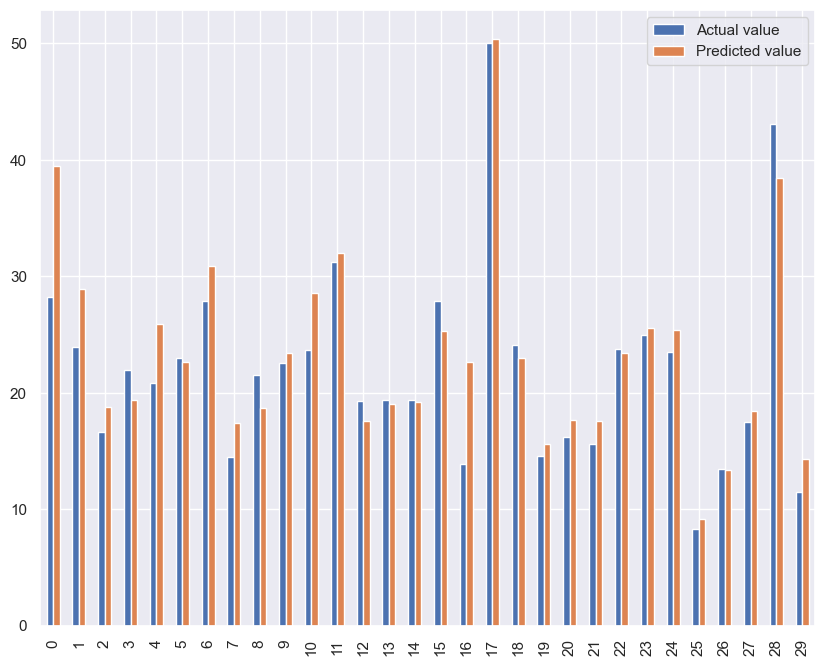

In [35]:
comparision_poly = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_poly})
print(comparision_poly)

df1 = comparision_poly.head(30)
df1.plot(kind = 'bar',figsize = (10,8))

**10.Decision Tree - Regression**

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=50, random_state=1)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, random_state=1)

In [37]:
y_pred_dtr=dtr.predict(X_test)

In [38]:
r2_score(y_test,y_pred_dtr)

0.5304476540297844

In [39]:
mse2 = mean_squared_error(y_test, y_pred_dtr)
mae2 = mean_absolute_error(y_test,y_pred_dtr)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

dtr_error = "MSE: " + str(round(mse2, 2)) + "," + " MAE: " + str(round(mae2, 2)) + "," +" RMSE: " + str(round(rmse2, 2))

     Actual value  Predicted value
0            28.2             46.7
1            23.9             23.3
2            16.6             22.5
3            22.0             20.9
4            20.8             25.0
..            ...              ...
164          20.8             16.1
165          20.1             15.0
166          23.1             24.7
167          13.1              7.2
168          16.2             17.4

[169 rows x 2 columns]


<Axes: >

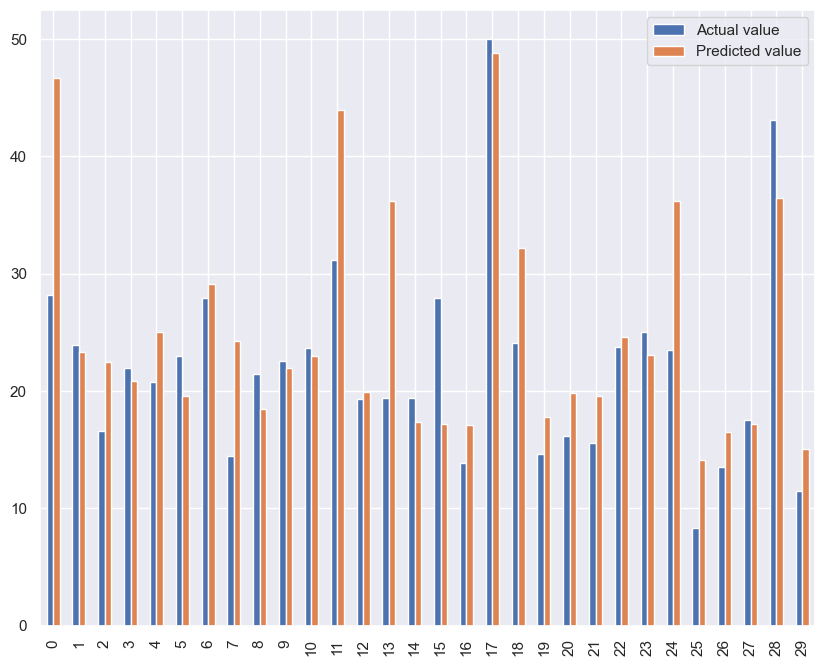

In [40]:
comparision_dtr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_dtr})
print(comparision_dtr)

df2 = comparision_dtr.head(30)
df2.plot(kind = 'bar',figsize = (10,8))

**11.Random Forest Regressor**

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [42]:
y_pred_rfr=rfr.predict(X_test)

In [43]:
r2_score(y_test,y_pred_rfr)

0.8357272911355118

In [44]:
mse3 = mean_squared_error(y_test, y_pred_rfr)
mae3 = mean_absolute_error(y_test,y_pred_rfr)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred_rfr))

rfr_error = "MSE: " + str(round(mse3, 2)) + "," + " MAE: " + str(round(mae3, 2)) + "," +" RMSE: " + str(round(rmse3, 2))

     Actual value  Predicted value
0            28.2           32.492
1            23.9           27.274
2            16.6           20.038
3            22.0           20.206
4            20.8           23.120
..            ...              ...
164          20.8           15.402
165          20.1           22.234
166          23.1           26.020
167          13.1            8.236
168          16.2           15.276

[169 rows x 2 columns]


<Axes: >

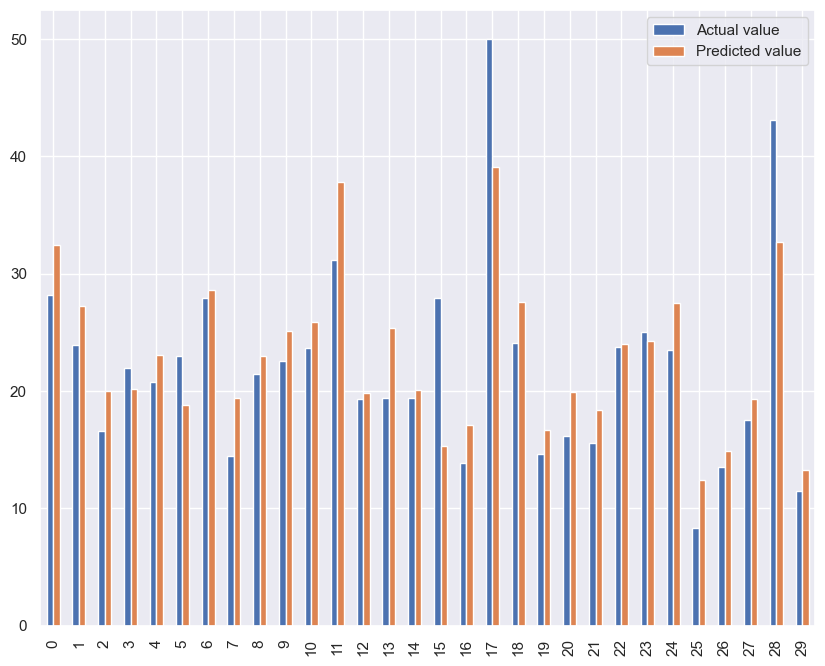

In [45]:
comparision_rfr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rfr})
print(comparision_rfr)

df3 = comparision_rfr.head(30)
df3.plot(kind = 'bar',figsize = (10,8))

**12. KNN Regressor**

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [50]:
y_pred_knn=knr.predict(X_test)

In [51]:
r2_score(y_test,y_pred_knn)

0.8054664433418828

In [52]:
mse4 = mean_squared_error(y_test, y_pred_knn)
mae4 = mean_absolute_error(y_test,y_pred_knn)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred_knn))

knn_error = "MSE: " + str(round(mse4, 2)) + "," + " MAE: " + str(round(mae4, 2)) + "," +" RMSE: " + str(round(rmse4, 2))

     Actual value  Predicted value
0            28.2            26.94
1            23.9            26.14
2            16.6            19.96
3            22.0            20.84
4            20.8            17.24
..            ...              ...
164          20.8            23.32
165          20.1            22.86
166          23.1            27.78
167          13.1             8.44
168          16.2            16.34

[169 rows x 2 columns]


<Axes: >

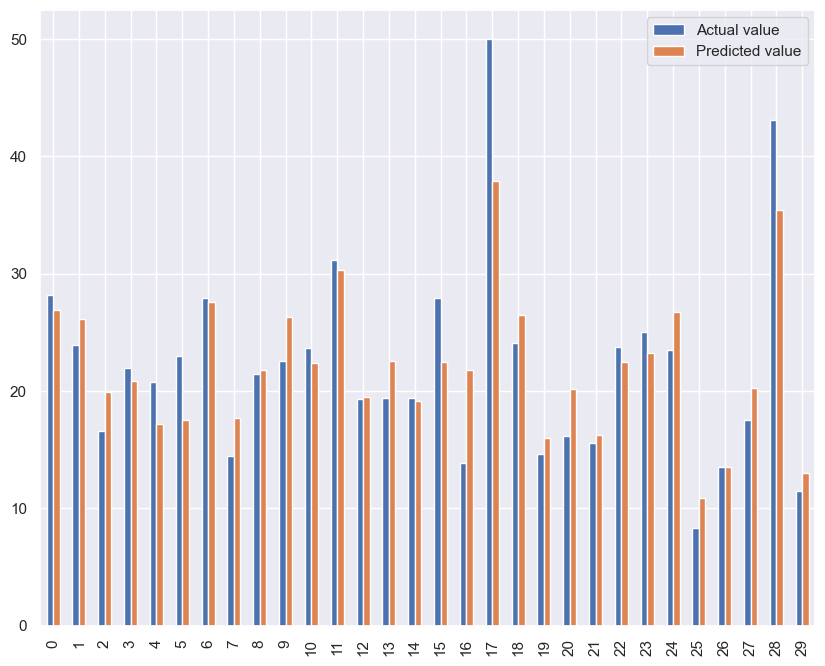

In [53]:
comparision_knn = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_knn})
print(comparision_knn)

df4 = comparision_knn.head(30)
df4.plot(kind = 'bar',figsize = (10,8))

**13.Gradient Boosting Regressor**

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [56]:
y_pred_gbr=gbr.predict(X_test)

In [57]:
r2_score(y_test,y_pred_gbr)

0.8725072668717702

In [58]:
mse5 = mean_squared_error(y_test, y_pred_gbr)
mae5 = mean_absolute_error(y_test,y_pred_gbr)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

gbr_error = "MSE: " + str(round(mse5, 2)) + "," + " MAE: " + str(round(mae5, 2)) + "," +" RMSE: " + str(round(rmse5, 2))

     Actual value  Predicted value
0            28.2        31.511645
1            23.9        26.177024
2            16.6        18.980223
3            22.0        20.674930
4            20.8        19.436720
..            ...              ...
164          20.8        16.754303
165          20.1        20.762205
166          23.1        22.435954
167          13.1         9.685759
168          16.2        16.247427

[169 rows x 2 columns]


<Axes: >

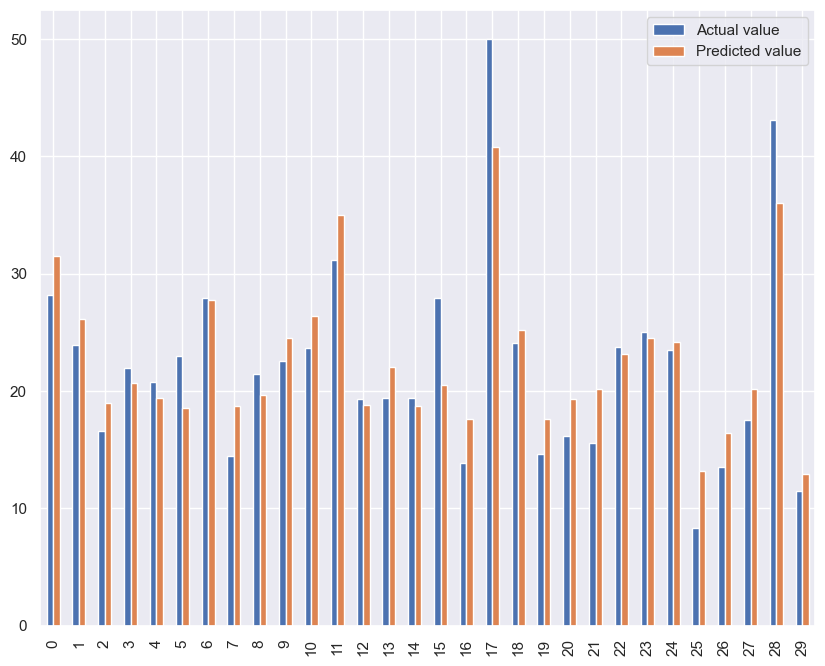

In [59]:
comparision_gbr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_gbr})
print(comparision_gbr)

df5 = comparision_gbr.head(30)
df5.plot(kind = 'bar',figsize = (10,8))

**14.Lasso Regression**

In [60]:
from sklearn.linear_model import Lasso
lr=Lasso(alpha=6.158482110660267e-05)
lr.fit(X_train,y_train)

Lasso(alpha=6.158482110660267e-05)

In [61]:
y_pred_lr=lr.predict(X_test)

In [62]:
r2_score(y_test,y_pred_lr)

0.7506490344846218

In [63]:
mse6 = mean_squared_error(y_test, y_pred_lr)
mae6 = mean_absolute_error(y_test,y_pred_lr)
rmse6 = np.sqrt(mean_squared_error(y_test, y_pred_lr))

lr_error = "MSE: " + str(round(mse6, 2)) + "," + " MAE: " + str(round(mae6, 2)) + "," +" RMSE: " + str(round(rmse6, 2))

     Actual value  Predicted value
0            28.2        32.561502
1            23.9        28.118086
2            16.6        17.921728
3            22.0        21.645662
4            20.8        17.362277
..            ...              ...
164          20.8        18.595806
165          20.1        20.870465
166          23.1        26.335209
167          13.1        16.207804
168          16.2        15.199975

[169 rows x 2 columns]


<Axes: >

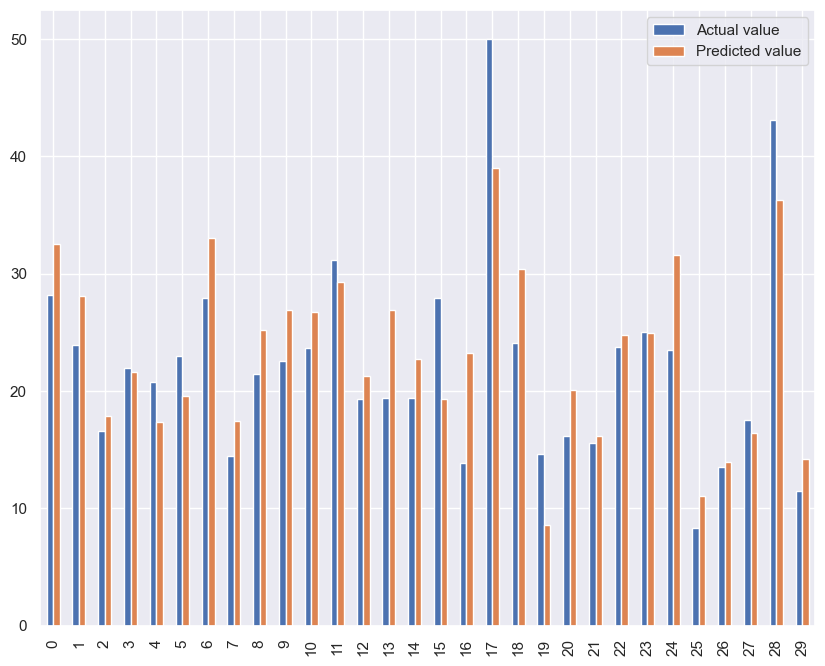

In [64]:
comparision_lr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
print(comparision_lr)

df6 = comparision_lr.head(30)
df6.plot(kind = 'bar',figsize = (10,8))

**15.Ridge Regression**

In [65]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.5689564)
rr.fit(X_train,y_train)

Ridge(alpha=0.5689564)

In [66]:
y_pred_rr=rr.predict(X_test)

In [67]:
r2_score(y_test,y_pred_rr)

0.7508826360671161

In [68]:
mse7 = mean_squared_error(y_test, y_pred_rr)
mae7 = mean_absolute_error(y_test,y_pred_rr)
rmse7 = np.sqrt(mean_squared_error(y_test, y_pred_rr))

rr_error = "MSE: " + str(round(mse7, 2)) + "," + " MAE: " + str(round(mae7, 2)) + "," +" RMSE: " + str(round(rmse7, 2))

     Actual value  Predicted value
0            28.2        32.489959
1            23.9        28.125125
2            16.6        17.922378
3            22.0        21.675319
4            20.8        17.349487
..            ...              ...
164          20.8        18.565639
165          20.1        20.879112
166          23.1        26.348103
167          13.1        16.209095
168          16.2        15.214145

[169 rows x 2 columns]


<Axes: >

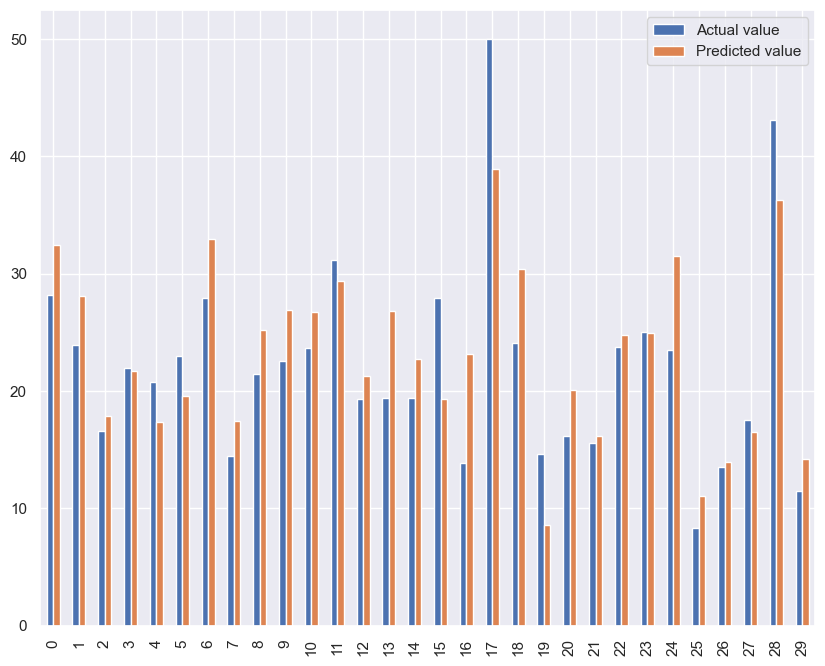

In [69]:
comparision_rr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rr})
print(comparision_rr)

df7 = comparision_rr.head(30)
df7.plot(kind = 'bar',figsize = (10,8))

In [70]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(random_state=0)
en.fit(X_train,y_train)

ElasticNet(random_state=0)

In [71]:
y_pred_en=rr.predict(X_test)

In [72]:
r2_score(y_test,y_pred_en)

0.7508826360671161

In [73]:
mse9 = mean_squared_error(y_test, y_pred_en)
mae9 = mean_absolute_error(y_test,y_pred_en)
rmse9 = np.sqrt(mean_squared_error(y_test, y_pred_en))

en_error = "MSE: " + str(round(mse9, 2)) + "," + " MAE: " + str(round(mae9, 2)) + "," +" RMSE: " + str(round(rmse9, 2))

     Actual value  Predicted value
0            28.2        32.489959
1            23.9        28.125125
2            16.6        17.922378
3            22.0        21.675319
4            20.8        17.349487
..            ...              ...
164          20.8        18.565639
165          20.1        20.879112
166          23.1        26.348103
167          13.1        16.209095
168          16.2        15.214145

[169 rows x 2 columns]


<Axes: >

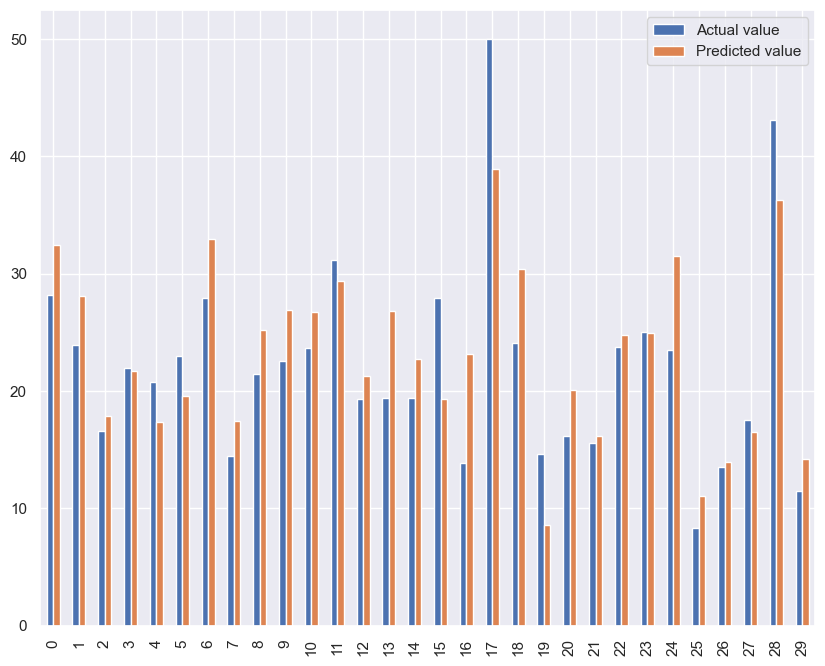

In [74]:
comparision_en = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_en})
print(comparision_en)

df8 = comparision_en.head(30)
df8.plot(kind = 'bar',figsize = (10,8))

**16. Support Vector Regressor**

In [75]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [76]:
y_pred_svr=svr.predict(X_test)

In [77]:
r2_score(y_test,y_pred_svr)

0.8761765917853116

In [78]:
mse8 = mean_squared_error(y_test, y_pred_svr)
mae8 = mean_absolute_error(y_test,y_pred_svr)
rmse8 = np.sqrt(mean_squared_error(y_test, y_pred_svr))

svr_error = "MSE: " + str(round(mse8, 2)) + "," + " MAE: " + str(round(mae8, 2)) + "," +" RMSE: " + str(round(rmse8, 2))

     Actual value  Predicted value
0            28.2        35.061305
1            23.9        23.793233
2            16.6        18.878180
3            22.0        20.384938
4            20.8        26.499260
..            ...              ...
164          20.8        19.693514
165          20.1        22.890575
166          23.1        23.797397
167          13.1         8.204266
168          16.2        14.846343

[169 rows x 2 columns]


<Axes: >

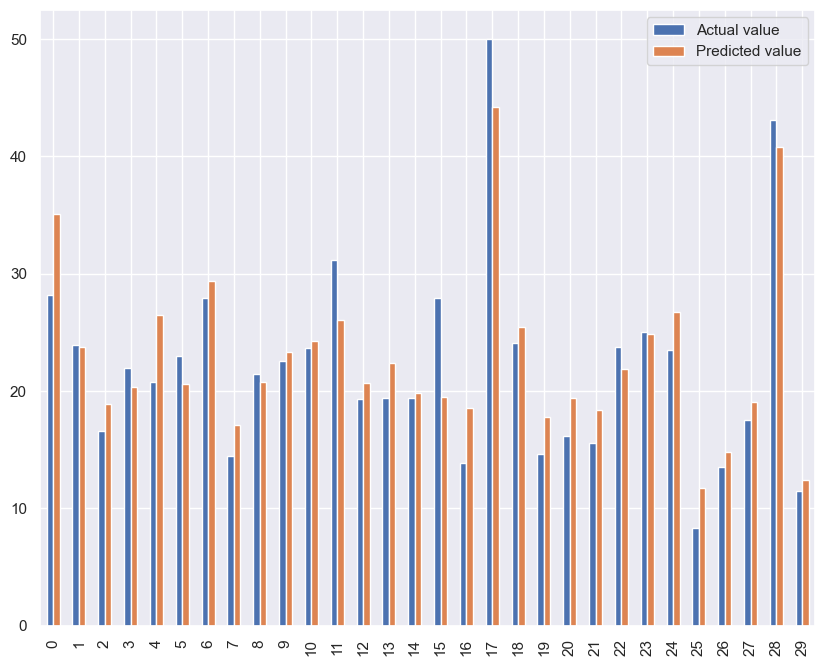

In [79]:
comparision_svr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svr})
print(comparision_svr)

df9 = comparision_svr.head(30)
df9.plot(kind = 'bar',figsize = (10,8))

**R2 Score and Error Values**

In [80]:
print('---------R2_score for different Regression Algorithms...................')
print('r2_score for Simple linear Regression is', r2_score(y_test, y_pred1))
print('r2_score for Polynomial Regression is', r2_score(y_test, y_pred_poly))
print('r2_score for Decision Tree Regression is',r2_score(y_test,y_pred_dtr))
print('r2_score for Random Forest Regression is', r2_score(y_test,y_pred_rfr))
print('r2_score for K-Nearest Neighbour Regression is', r2_score(y_test,y_pred_knn))
print('r2_score for Gradient Boosting Regression is', r2_score(y_test,y_pred_gbr))
print('r2_score for Lasso Regression is', r2_score(y_test,y_pred_lr))
print('r2_score for Ridge Regression is', r2_score(y_test,y_pred_rr))
print('r2_score for Elastic Net Regression is', r2_score(y_test,y_pred_en))
print('r2_score for Support Vector Regression is', r2_score(y_test,y_pred_svr))

---------R2_score for different Regression Algorithms...................
r2_score for Simple linear Regression is 0.7506463551085165
r2_score for Polynomial Regression is 0.7463680885616796
r2_score for Decision Tree Regression is 0.5304476540297844
r2_score for Random Forest Regression is 0.8357272911355118
r2_score for K-Nearest Neighbour Regression is 0.8054664433418828
r2_score for Gradient Boosting Regression is 0.8725072668717702
r2_score for Lasso Regression is 0.7506490344846218
r2_score for Ridge Regression is 0.7508826360671161
r2_score for Elastic Net Regression is 0.7508826360671161
r2_score for Support Vector Regression is 0.8761765917853116


In [81]:
print('---------Error value for different Regression Algorithms...................')
print("Linear Regression Error values:-- ", lin_error)
print("Polynomial Regression Error values:-- ", poly_error)
print("Decision Tree Regression Error values:-- ", dtr_error)
print("Random Forest Regression Error values:-- ", rfr_error)
print("K-Nearest Neighbour Regression Error values:-- ", knn_error)
print("Gradient Boosting Regression Error values:-- ", gbr_error)
print("Lasso Regression Error values:-- ", lr_error)
print("Ridge Regression Error values:-- ", rr_error)
print("Elastic Net Regression Error values:-- ", en_error)
print("Support Vector Regression Error values:-- ", svr_error)

---------Error value for different Regression Algorithms...................
Linear Regression Error values:--  MSE: 21.91, MAE: 3.5, RMSE: 4.68
Polynomial Regression Error values:--  MSE: 22.28, MAE: 3.07, RMSE: 4.72
Decision Tree Regression Error values:--  MSE: 41.26, MAE: 4.3, RMSE: 6.42
Random Forest Regression Error values:--  MSE: 14.43, MAE: 2.86, RMSE: 3.8
K-Nearest Neighbour Regression Error values:--  MSE: 17.09, MAE: 2.86, RMSE: 4.13
Gradient Boosting Regression Error values:--  MSE: 11.2, MAE: 2.56, RMSE: 3.35
Lasso Regression Error values:--  MSE: 21.91, MAE: 3.5, RMSE: 4.68
Ridge Regression Error values:--  MSE: 21.89, MAE: 3.5, RMSE: 4.68
Elastic Net Regression Error values:--  MSE: 21.89, MAE: 3.5, RMSE: 4.68
Support Vector Regression Error values:--  MSE: 10.88, MAE: 2.47, RMSE: 3.3


Hope! The basic steps for the regression types for the Boston Housing dataset got understood! Happy Learning



**PREMANAND S**